In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

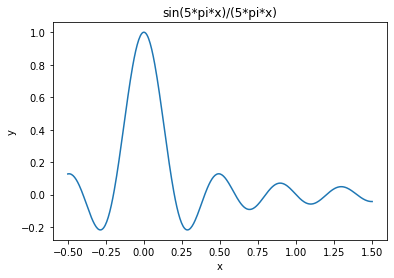

In [2]:
x = torch.linspace(-0.5,1.5,400).unsqueeze(1)
y = torch.sinc(5*x)

plt.plot(x, y)
plt.title('sin(5*pi*x)/(5*pi*x)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
torch.manual_seed(1)

In [3]:
print(y.shape)

torch.Size([400, 1])


In [4]:
#Define the first DNN model

class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()
        self.fc1 = nn.Linear(1,5)
        self.fc2 = nn.Linear(5,10)
        self.fc3 = nn.Linear(10,10)
        self.fc4 = nn.Linear(10,10)
        self.fc5 = nn.Linear(10,10)
        self.fc6 = nn.Linear(10,10)
        self.fc7 = nn.Linear(10,5)
        self.pred = nn.Linear(5,1)
        
    def forward(self, x): 
        x = nn.functional.leaky_relu(self.fc1(x))
        x = nn.functional.leaky_relu(self.fc2(x))
        x = nn.functional.leaky_relu(self.fc3(x))
        x = nn.functional.leaky_relu(self.fc4(x))
        x = nn.functional.leaky_relu(self.fc5(x))
        x = nn.functional.leaky_relu(self.fc6(x))
        x = nn.functional.leaky_relu(self.fc7(x))
        x = self.pred(x)
        return x

In [5]:
#Define the second DNN model

class Model2(nn.Module):
    def __init__(self):
        super(Model2, self).__init__()
        self.fc1 = nn.Linear(1,10)
        self.fc2 = nn.Linear(10,18)
        self.fc3 = nn.Linear(18,15)
        self.fc4 = nn.Linear(15,4)
        self.pred = nn.Linear(4,1)     
        
    def forward(self, x): 
        x = nn.functional.leaky_relu(self.fc1(x))
        x = nn.functional.leaky_relu(self.fc2(x))
        x = nn.functional.leaky_relu(self.fc3(x))
        x = nn.functional.leaky_relu(self.fc4(x))
        x = self.pred(x)
        return x

In [6]:
#Define the third DNN model

class Model3(nn.Module):
    def __init__(self):
        super(Model3, self).__init__()
        self.fc1 = nn.Linear(1,190)
        self.pred = nn.Linear(190,1)   
        #self.relu = nn.ReLU()
        
    def forward(self, x): 
        x = nn.functional.leaky_relu(self.fc1(x))
        x = self.pred(x)
        return x

In [7]:
M1 = Model1()
M2 = Model2()
M3 = Model3()
M1_params = sum(p.numel() for p in M1.parameters())
M2_params = sum(p.numel() for p in M2.parameters())
M3_params = sum(p.numel() for p in M3.parameters())
print(M1_params,M2_params,M3_params)

571 572 571


In [8]:
criterion = nn.MSELoss()

print("Model 1")
Losses1 =[]
optimizer1 = optim.Adam(M1.parameters(), lr=0.001, weight_decay=1e-4)
for i in range(20000):
    optimizer1.zero_grad()
    output1 = M1.forward(x)
    loss = criterion(output1, y)
    loss=loss.float()
    loss.backward()
    optimizer1.step()
    Losses1.append(loss.item())


Model 1


In [9]:
print("Model 2")
Losses2 =[]
optimizer2 = optim.Adam(M2.parameters(), lr=0.001, weight_decay=1e-4)
for i in range(20000):
    optimizer2.zero_grad()
    output2 = M2.forward(x)
    loss2 = criterion(output2, y)
    loss2=loss2.float()
    loss2.backward()
    optimizer2.step()
    Losses2.append(loss2.item())

Model 2


In [10]:
print("Model 3")
Losses3 =[]
optimizer3 = optim.Adam(M3.parameters(), lr=0.001, weight_decay=1e-4)
for i in range(20000):
    optimizer3.zero_grad()
    output3 = M3.forward(x)
    loss3 = criterion(output3, y)
    loss3=loss3.float()
    loss3.backward()
    optimizer3.step()
    Losses3.append(loss3.item())

Model 3


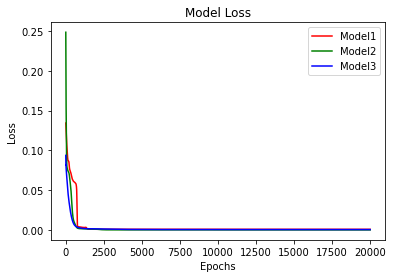

In [11]:
plt.plot(np.arange(0,20000), Losses1, "r")
plt.plot(np.arange(0,20000), Losses2, "g")
plt.plot(np.arange(0,20000), Losses3, "b")
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Model1', 'Model2', 'Model3'])

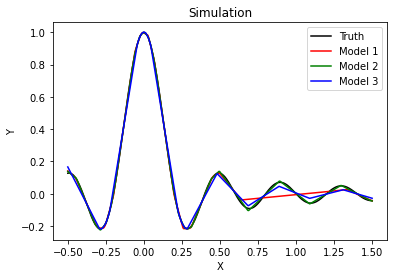

In [12]:
plt.plot(x, y, "black", label = 'Truth')
plt.plot(x, output1.detach().numpy(), "r", label = 'Model 1')
plt.plot(x, output2.detach().numpy(), "g", label = 'Model 2')
plt.plot(x, output3.detach().numpy(), "b", label = 'Model 3')
plt.title('Simulation')
plt.ylabel('Y')
plt.xlabel('X')
plt.legend()
plt.show()

In [13]:
##function 2

In [14]:
x = torch.linspace(-1.5,1.5,400).unsqueeze(1)
y = np.sign(np.sin(5*np.pi*x))

In [15]:
criterion = nn.MSELoss()

print("Function 2 Model 1")
Losses_b1 =[]
optimizer_b1 = optim.Adam(M1.parameters(), lr=0.001, weight_decay=1e-4)
for i in range(20000):
    optimizer_b1.zero_grad()
    output_b1 = M1.forward(x)
    loss = criterion(output_b1, y)
    loss=loss.float()
    loss.backward()
    optimizer_b1.step()
    Losses_b1.append(loss.item())

Function 2 Model 1


In [16]:
print("Function 2 Model 2")
Losses_b2 =[]
optimizer_b2 = optim.Adam(M2.parameters(), lr=0.001, weight_decay=1e-4)
for i in range(20000):
    optimizer_b2.zero_grad()
    output_b2 = M2.forward(x)
    loss = criterion(output_b2, y)
    loss=loss.float()
    loss.backward()
    optimizer_b2.step()
    Losses_b2.append(loss.item())

Function 2 Model 2


In [17]:
print("Function 2 Model 3")
Losses_b3 =[]
optimizer_b3 = optim.Adam(M3.parameters(), lr=0.001, weight_decay=1e-4)
for i in range(20000):
    optimizer_b3.zero_grad()
    output_b3 = M3.forward(x)
    loss = criterion(output_b3, y)
    loss=loss.float()
    loss.backward()
    optimizer_b3.step()
    Losses_b3.append(loss.item())

Function 2 Model 3


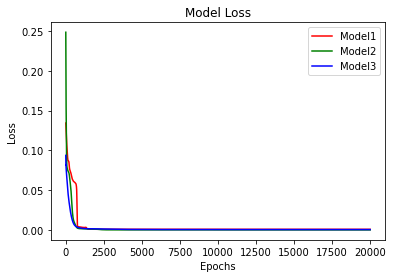

In [18]:
plt.plot(np.arange(0,20000), Losses1, "r")
plt.plot(np.arange(0,20000), Losses2, "g")
plt.plot(np.arange(0,20000), Losses3, "b")
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Model1', 'Model2', 'Model3'])

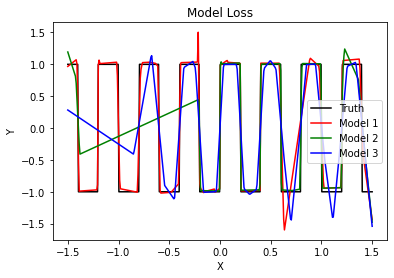

In [19]:
plt.plot(x, y, "black",label = 'Truth')
plt.plot(x, output_b1.detach().numpy(), "r", label = 'Model 1')
plt.plot(x, output_b2.detach().numpy(), "g", label = 'Model 2')
plt.plot(x, output_b3.detach().numpy(), "b", label = 'Model 3')
plt.title('Simulation')
plt.ylabel('Y')
plt.xlabel('X')
plt.legend()
plt.show()